Алиева Хадижат ПИ20-1. Лабораторная работа 6.1. Кластеризация

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

1. Загрузите прилагающийся датасет.

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


2. Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.

In [4]:
df.isna().sum()
#все значения присутствуют в датасете

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

3. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

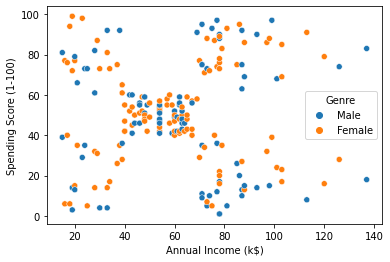

In [5]:
f, ax = plt.subplots()
sns.scatterplot(y="Spending Score (1-100)", x="Annual Income (k$)", hue="Genre",data=df, ax=ax)
plt.show()
#корреляции между полом и тратами/поступлениями не выявлено

4. Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

In [6]:
#создаем отдельный датасет с Annual Income и Spending Score
first_df = df.iloc[:,[3,4]]
first_df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
values_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++',random_state = 0)
    kmeans.fit(first_df) 
    values_list.append(kmeans.inertia_)

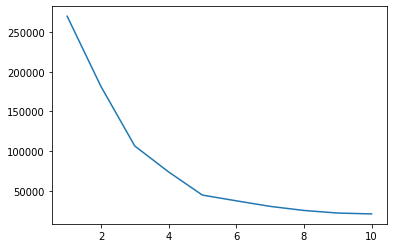

In [9]:
plt.plot(range(1,11), values_list)
plt.show()
#оптимальное кол-во кластеров 5

5. Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [10]:
kmeans = KMeans(n_clusters = 5, init ='k-means++',random_state = 0)
predicted = kmeans.fit_predict(first_df)
predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [12]:
assert predicted.shape[0] == first_df.shape[0]

items_list = zip(predicted, first_df["Annual Income (k$)"].to_list(), first_df["Spending Score (1-100)"].to_list())
for predict, income, score  in items_list:
    print(f"Класс: {predict}, income: {income}, score: {score}")

Класс: 4, income: 15, score: 39
Класс: 3, income: 15, score: 81
Класс: 4, income: 16, score: 6
Класс: 3, income: 16, score: 77
Класс: 4, income: 17, score: 40
Класс: 3, income: 17, score: 76
Класс: 4, income: 18, score: 6
Класс: 3, income: 18, score: 94
Класс: 4, income: 19, score: 3
Класс: 3, income: 19, score: 72
Класс: 4, income: 19, score: 14
Класс: 3, income: 19, score: 99
Класс: 4, income: 20, score: 15
Класс: 3, income: 20, score: 77
Класс: 4, income: 20, score: 13
Класс: 3, income: 20, score: 79
Класс: 4, income: 21, score: 35
Класс: 3, income: 21, score: 66
Класс: 4, income: 23, score: 29
Класс: 3, income: 23, score: 98
Класс: 4, income: 24, score: 35
Класс: 3, income: 24, score: 73
Класс: 4, income: 25, score: 5
Класс: 3, income: 25, score: 73
Класс: 4, income: 28, score: 14
Класс: 3, income: 28, score: 82
Класс: 4, income: 28, score: 32
Класс: 3, income: 28, score: 61
Класс: 4, income: 29, score: 31
Класс: 3, income: 29, score: 87
Класс: 4, income: 30, score: 4
Класс: 3, inc

6. Построить графическую интерпретацию из пункта 3, с центрами кластеров.

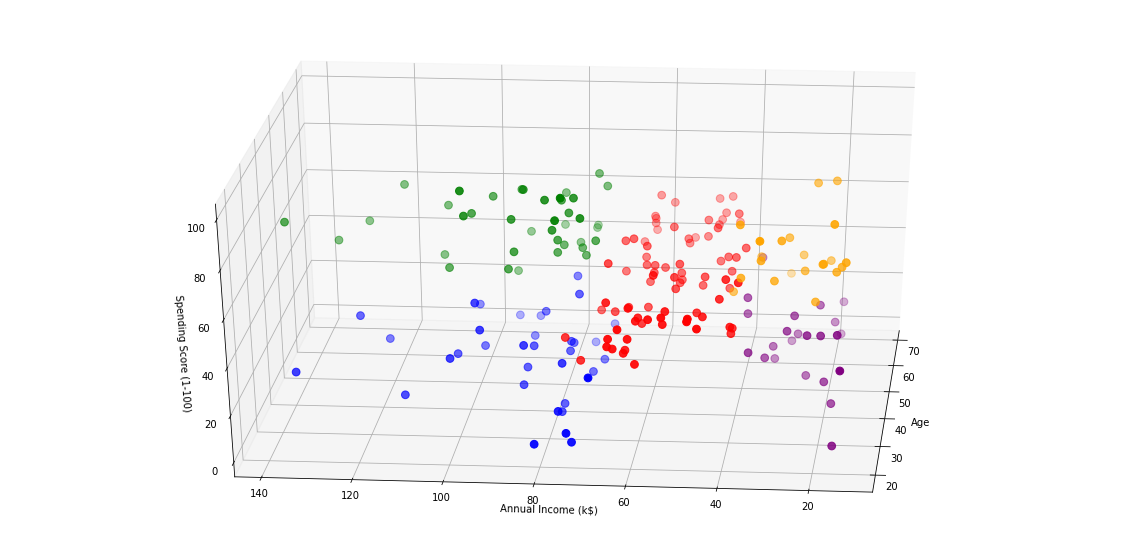

In [16]:
df["label"] = predicted
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()

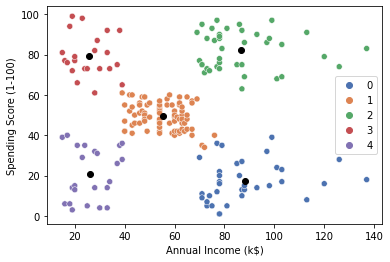

In [14]:
f, ax = plt.subplots()
sns.scatterplot(x=first_df['Annual Income (k$)'], y=first_df['Spending Score (1-100)'], hue=predicted, palette="deep", data=first_df, ax=ax)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black')
plt.show()

Из приведенного выше графика видно, что клиентов можно разделить на 5 кластеров и использовать их данные в целях маркетинга

0 = Средние покупатели со средним доходом (Можно использовать больше рекламы, чтобы стимулировать постоянное взаимодействие)

1 = Клиенты с высокими расходами и низким доходом (Можно использовать больше рекламы)

2 = Клиенты с высоким доходом и высокими расходами (Можно использовать более эксклюзивные и VIP-предложения)

3 = Клиенты с низким доходом и низкими расходами (Можно использовать больше рекламных предложений и больших скидок)

4 = Клиенты с высоким доходом и низкими расходами (Можно использовать VIP-предложения по кредитным картам)

7. Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

In [17]:
#создаем отдельный dataframe с возрастом и тратами
second_df = df.iloc[:,[2,4]]
second_df

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


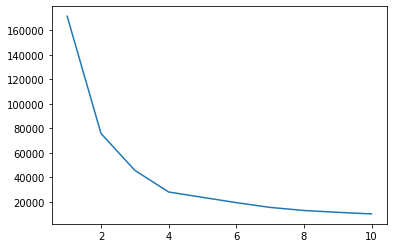

In [19]:
#ищем оптимальное кол-во классов
values_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 0)
    kmeans.fit(second_df) 
    values_list.append(kmeans.inertia_)

plt.plot(range(1,11),values_list)
plt.show()
#оптимальное кол-во кластеров - 4

In [20]:
#получаем сами кластеры с помощью k-средних
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=0)
predicted = kmeans2.fit_predict(second_df)
print(predicted)

[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [21]:
assert predicted.shape[0] == second_df.shape[0]

items_list = zip(predicted, second_df["Age"].to_list(), second_df["Spending Score (1-100)"].to_list())
for predict, income, score  in items_list:
    print(f"Класс: {predict}, age: {income}, score: {score}")

Класс: 2, age: 19, score: 39
Класс: 1, age: 21, score: 81
Класс: 0, age: 20, score: 6
Класс: 1, age: 23, score: 77
Класс: 2, age: 31, score: 40
Класс: 1, age: 22, score: 76
Класс: 0, age: 35, score: 6
Класс: 1, age: 23, score: 94
Класс: 0, age: 64, score: 3
Класс: 1, age: 30, score: 72
Класс: 0, age: 67, score: 14
Класс: 1, age: 35, score: 99
Класс: 0, age: 58, score: 15
Класс: 1, age: 24, score: 77
Класс: 0, age: 37, score: 13
Класс: 1, age: 22, score: 79
Класс: 2, age: 35, score: 35
Класс: 2, age: 20, score: 66
Класс: 0, age: 52, score: 29
Класс: 1, age: 35, score: 98
Класс: 2, age: 35, score: 35
Класс: 1, age: 25, score: 73
Класс: 0, age: 46, score: 5
Класс: 1, age: 31, score: 73
Класс: 0, age: 54, score: 14
Класс: 1, age: 29, score: 82
Класс: 0, age: 45, score: 32
Класс: 2, age: 35, score: 61
Класс: 0, age: 40, score: 31
Класс: 1, age: 23, score: 87
Класс: 0, age: 60, score: 4
Класс: 1, age: 21, score: 73
Класс: 0, age: 53, score: 4
Класс: 1, age: 18, score: 92
Класс: 0, age: 49, s

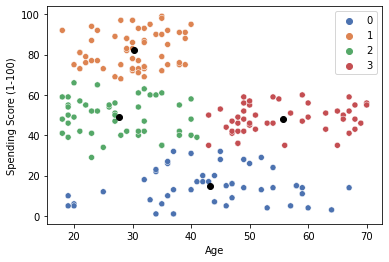

In [24]:
#визуализируем кластеры по возрасту и тратам
f, ax = plt.subplots()
sns.scatterplot(x=second_df['Age'], y=second_df['Spending Score (1-100)'], hue=predicted, palette="deep", data=second_df, ax=ax)
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],c='black')
plt.show()
#из приведенного выше графика видно, что в ранних возрастных группах 
#больше кластеров по сравнению со старшими возрастными группами, 
#т.к. с возрастом расходы уменьшаются

8. Оцените модель с помощью метрик.

In [25]:
#silhouette_score: Измеряет расстояние разделения между кластерами, 
#ближе к 1 - хороший результат

from sklearn.metrics import silhouette_score, calinski_harabasz_score
print(silhouette_score(second_df, predicted))

0.49973941540141753


In [26]:
#calinski_harabasz_score, также известен как критерий соотношения дисперсий. 
#Этот показатель определяется как отношение между внутрикластерной дисперсией 
#и межкластерной дисперсией.

print(calinski_harabasz_score(second_df, predicted))

332.5631268443306


9. Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

In [28]:
iter_list = list(range(2,25))
silhouette_list = []
calinski_harabasz_list = []

for n_clusters in iter_list:
    
    kmeans2 = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    predicted = kmeans2.fit_predict(second_df)
    centers = kmeans2.cluster_centers_
    
    score1 = silhouette_score(second_df, predicted)
    score2 = calinski_harabasz_score(second_df, predicted)
    
    silhouette_list.append(score1)
    calinski_harabasz_list.append(score2)
    print(f"Кол-во: {n_clusters}, silhouette = {round(score1,5)}, calinski_harabasz = {round(score2,5)})")
#т.к. нам необходимо красиво отобразить обе метрики на графике, 
#то используем Max-min нормализацию

Кол-во: 2, silhouette = 0.46923, calinski_harabasz = 249.19429)
Кол-во: 3, silhouette = 0.453, calinski_harabasz = 270.08633)
Кол-во: 4, silhouette = 0.49974, calinski_harabasz = 332.56313)
Кол-во: 5, silhouette = 0.44527, calinski_harabasz = 302.43944)
Кол-во: 6, silhouette = 0.44055, calinski_harabasz = 302.46952)
Кол-во: 7, silhouette = 0.40833, calinski_harabasz = 321.55914)
Кол-во: 8, silhouette = 0.42903, calinski_harabasz = 332.19775)
Кол-во: 9, silhouette = 0.41199, calinski_harabasz = 329.64461)
Кол-во: 10, silhouette = 0.40531, calinski_harabasz = 331.06297)
Кол-во: 11, silhouette = 0.39096, calinski_harabasz = 318.32893)
Кол-во: 12, silhouette = 0.3794, calinski_harabasz = 317.62803)
Кол-во: 13, silhouette = 0.40573, calinski_harabasz = 319.52722)
Кол-во: 14, silhouette = 0.3975, calinski_harabasz = 322.98135)
Кол-во: 15, silhouette = 0.42495, calinski_harabasz = 330.3641)
Кол-во: 16, silhouette = 0.41172, calinski_harabasz = 334.48142)
Кол-во: 17, silhouette = 0.39578, cali

In [29]:
#С numpy рабтать проще
silhouette_list = np.array(silhouette_list)
calinski_harabasz_list = np.array(calinski_harabasz_list)

silhouette_list = (silhouette_list - silhouette_list.min()) / (silhouette_list.max() - silhouette_list.min())
calinski_harabasz_list = (calinski_harabasz_list - calinski_harabasz_list.min()) / (calinski_harabasz_list.max() - calinski_harabasz_list.min())

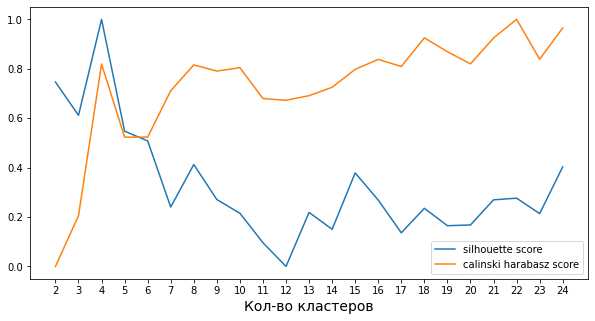

In [30]:
x = iter_list
y = silhouette_list
z = calinski_harabasz_list

fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, label='silhouette score')
plt.plot(x, z, label='calinski harabasz score')

plt.xlabel('Кол-во кластеров', fontsize=14)

plt.xticks(x)
plt.legend()
plt.show()
#как видим из графика, наиболее привлекательные метрики возникают 
#при количестве кластеров 4, что еще раз подтверждает правильность 
#определения количества кластеров мной